In [1]:
import ptc_track.optics_parameters as ptc_track_optics
import ptc_track.madx_configuration as ptc_track_conf
import ptc_twiss.optics_parameters as ptc_twiss_optics
import ptc_twiss.madx_configuration as ptc_twiss_conf
import approximator.optics_parameters as approximator_optics
import approximator.runner as aproximator_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as visualizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2017_matched"

ptc_twiss_script_file_name = "ptc_twiss_script.madx"

xml_file_name = "configuration_reco_beam1.xml"
item_number = 3

serialized_approximator_file_name = "parametrization_6500GeV_0p4_total.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

name_of_folder_with_sources = "optics_generator_python"

In [3]:
path_to_script = os.path.join(path_to_project, optic_folder_name, ptc_twiss_script_file_name)
s = 220.00
twiss_configuration = ptc_twiss_conf.TwissConfiguration(path_to_script, s)

In [4]:
path_to_optic = os.path.join(path_to_project, optic_folder_name)
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
track_configuration = ptc_track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_optic)

In [16]:
# Parameters of bunch
x_mean = 0.00055266
delta_x = 0.000
theta_x_mean = 0.00018
delta_theta_x = 0.0000
y_mean = -0.00150
delta_y = 0
theta_y_mean = 0.00
delta_theta_y = 0
pt_mean = -0.075
delta_pt = 0.075

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 31

In [17]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, delta_x, x_resolution,
                                                        theta_x_mean, delta_theta_x, theta_x_resolution,
                                                        y_mean, delta_y, y_resolution,
                                                        theta_y_mean, delta_theta_y, theta_y_resolution,
                                                        pt_mean, delta_pt, pt_resolution)

In [18]:
title_suffix = "2017 nominal, XA = 140μrad, x = 0, canonical coordinates"

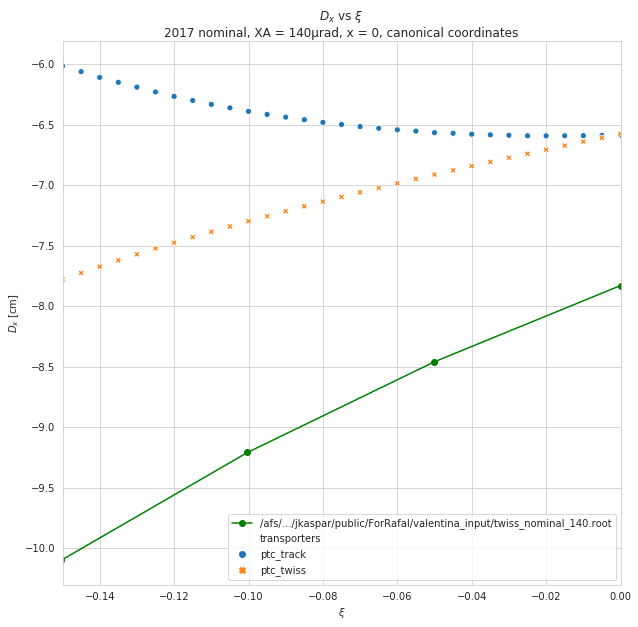

In [19]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_x, track_configuration),
#     "new approximator": (approximator_optics.compute_d_x, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_d_x, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", title_suffix, plot_size=10, plot_function=sns.scatterplot)
# axes.set_yticks(list(-14.5 + x for x in range(10)))
# axes.set_ylim(-14.5, -6.5)
x = [0,  -0.050018368065089025, -0.10027339414774145, -0.15027610102049133]
y = [-7.83, -8.46, -9.21, -10.1]
axes.plot(x, y, color='green', marker='o', label="/afs/.../jkaspar/public/ForRafal/valentina_input/twiss_nominal_140.root")
axes.legend()

In [9]:
optic_folder_name = "2017_matched"
path_to_optic = os.path.join(path_to_project, optic_folder_name)
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
track_configuration = ptc_track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_optic)

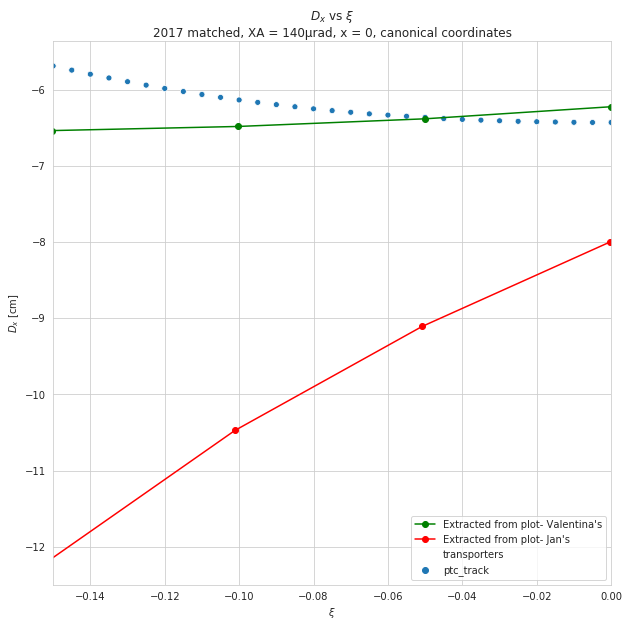

In [10]:
title_suffix = "2017 matched, XA = 140μrad, x = 0, canonical coordinates"
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_x, track_configuration),
#     "new approximator": (approximator_optics.compute_d_x, approximator),
#     "ptc_twiss": (ptc_twiss_optics.compute_d_x, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", title_suffix, plot_size=10, plot_function=sns.scatterplot)
# Values from screen shot- Jan's plots
x = [0,  -0.050018368065089025, -0.10027339414774145, -0.15027610102049133]
y = [-62.22740824668114, -63.812668937861844, -64.81788546834701, -65.3592600183294]
scaled_y = [y_v * 1e-1 for y_v in y]
axes.plot(x, scaled_y, color='green', marker='o', label="Extracted from plot- Valentina's")
axes.legend()
h_x = [-0.0002749409321703977, -0.0508304298900632, -0.10114868078623135, -0.15098259480821902]
h_y = [79.97675956396154, 91.07474449054718, 104.72473037613932, 121.73955243792557]
scaled_h_y = [-y_v * 1e-1 for y_v in h_y]
axes.plot(h_x, scaled_h_y, color='red', marker='o', label="Extracted from plot- Jan's")
axes.legend()

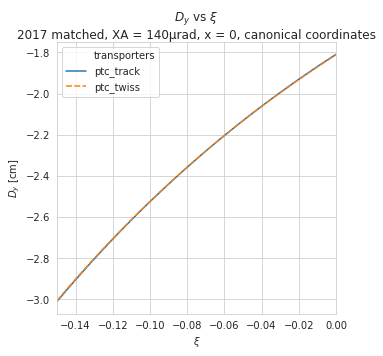

In [11]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_y, track_configuration),
#     "new approximator": (approximator_optics.compute_d_y, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_d_y, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D y", title_suffix)
# axes.set_yticks(list(-4 + x * 0.25 for x in range(12)))
# axes.set_ylim(-4, -1.75)

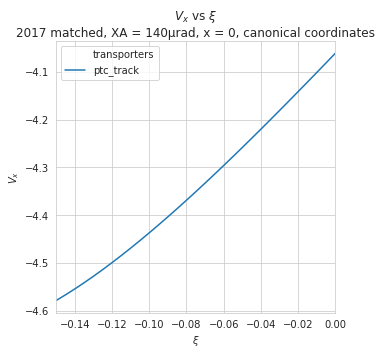

In [12]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_v_x, track_configuration),
#     "new approximator": (approximator_optics.compute_v_x, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V x", title_suffix)

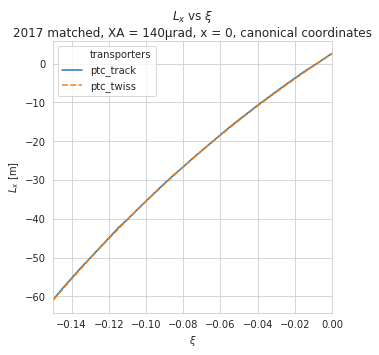

In [13]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_x, track_configuration),
#     "new approximator": (approximator_optics.compute_l_x, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_x, twiss_configuration)
}
axes = visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L x", title_suffix)
# axes.set_yticks(list(-250 + 25 * x for x in range(11)))
# axes.set_ylim(-225, 25)

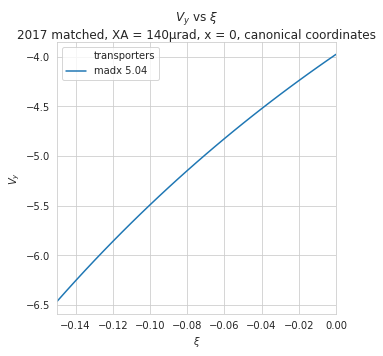

In [14]:
transporters = {
    "madx 5.04": (ptc_track_optics.compute_v_y, track_configuration),
#     "new approximator": (approximator_optics.compute_v_y, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V y", title_suffix)

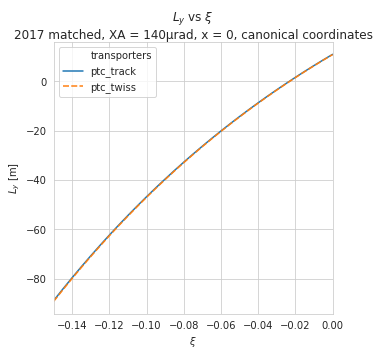

In [15]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_y, track_configuration),
#     "new approximator": (approximator_optics.compute_l_y, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_y, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L y", title_suffix)